<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/Stat_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проектная работа по модулю “Математика и статистика в Python”
1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn import preprocessing
#import kaggle

%matplotlib inline

In [38]:
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [6]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

***2. Заменим екстовые значения на числовые***

In [0]:
le = preprocessing.LabelEncoder()
data['sales_enc'] = le.fit_transform(data['sales'])
le = preprocessing.LabelEncoder()
data['salary_enc'] = le.fit_transform(data['salary'])

In [18]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_enc,salary_enc
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


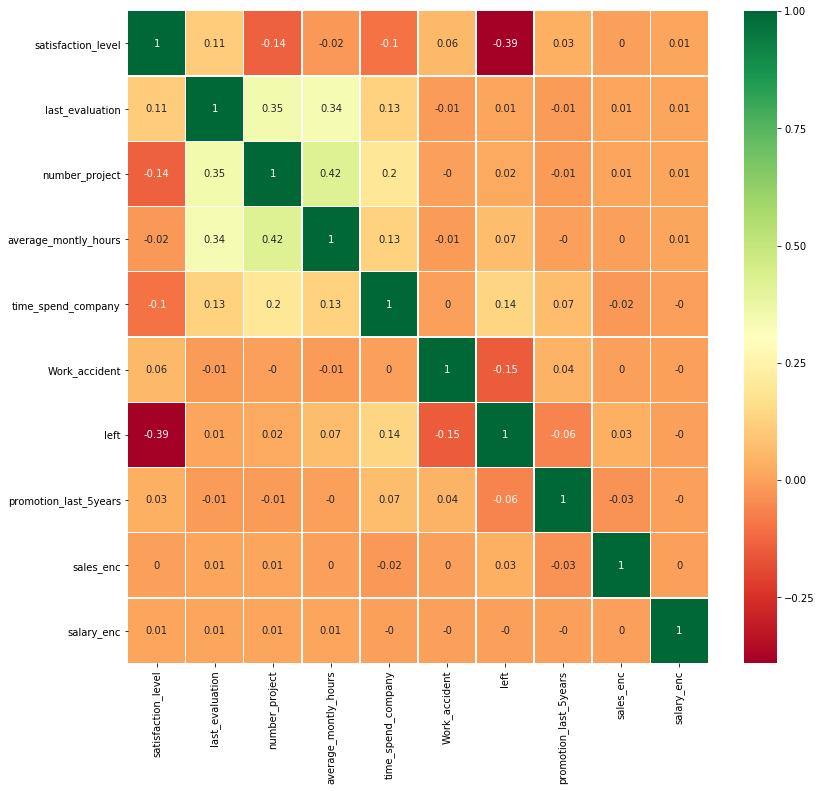

In [19]:
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

***4.Визуализировать несколько взаимосвязей между переменными.***

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


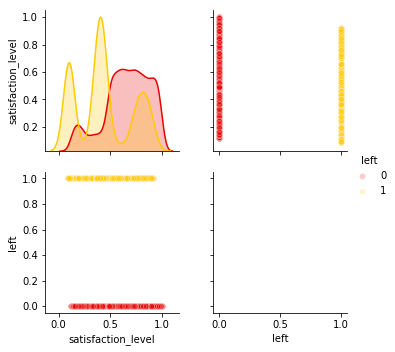

In [28]:
data_v = data[['satisfaction_level','left']]
sns.pairplot(data=data_v,hue = 'left', plot_kws={'alpha':0.2},palette='hot')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


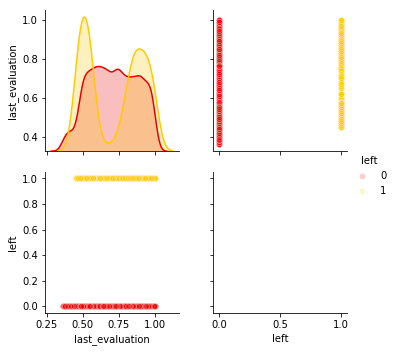

In [145]:
data_v = data[['last_evaluation','left']]
sns.pairplot(data=data_v,hue = 'left', plot_kws={'alpha':0.2},palette='hot')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


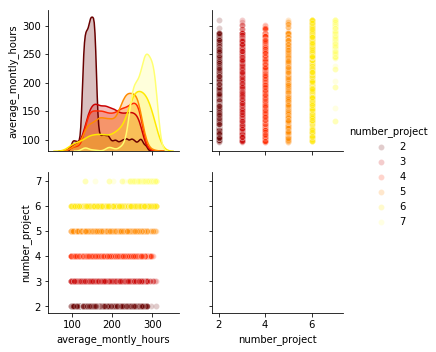

In [29]:
data_v = data[['average_montly_hours','number_project']]
sns.pairplot(data=data_v,hue = 'number_project', plot_kws={'alpha':0.2},palette='hot')
plt.show()

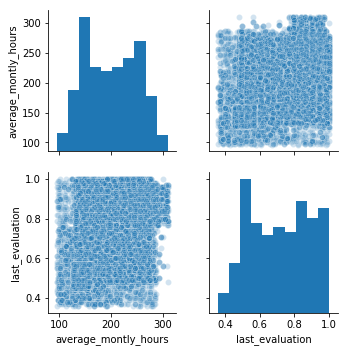

In [32]:
data_v = data[['average_montly_hours','last_evaluation']]
sns.pairplot(data=data_v, plot_kws={'alpha':0.2},palette='hot')
plt.show()

***5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.***

In [47]:
# проверим гипотезу, что выборки satisfaction_level с разными left отличаются
left1 = data[data['left']==1]['satisfaction_level']
left2 = data[data['left']!=1]['satisfaction_level']

print(left1.mean())
print(left2.mean())
stats.ttest_ind(left1, left2)

0.44009801176140917
0.666809590479516


Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

***Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий между двумя выборками***

In [52]:
# проверим гипотезу, что выборки average_montly_hours с разными number_project отличаются
nabor = []
for number_project in sorted(data['number_project'].unique()):
  data_n = data[data['number_project']==number_project]['average_montly_hours']
  nabor.append(data_n)
  print('среднее значение выборки с количеством проектов ',number_project, ' : ',data_n.mean())
  

stats.f_oneway(*nabor)

среднее значение выборки с количеством проектов  2  :  160.34254606365158
среднее значение выборки с количеством проектов  3  :  197.5075215782984
среднее значение выборки с количеством проектов  4  :  205.122107674685
среднее значение выборки с количеством проектов  5  :  212.0615718942412
среднее значение выборки с количеством проектов  6  :  238.69420783645657
среднее значение выборки с количеством проектов  7  :  276.078125


F_onewayResult(statistic=754.414887643022, pvalue=0.0)

***Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий между этим набором выборок при разных количествах number_project***

***6.Рассчитать сколько работников работает в каждом департаменте.***

In [124]:
data[data['left'] == 0]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

***7.Показать распределение сотрудников по зарплатам.***

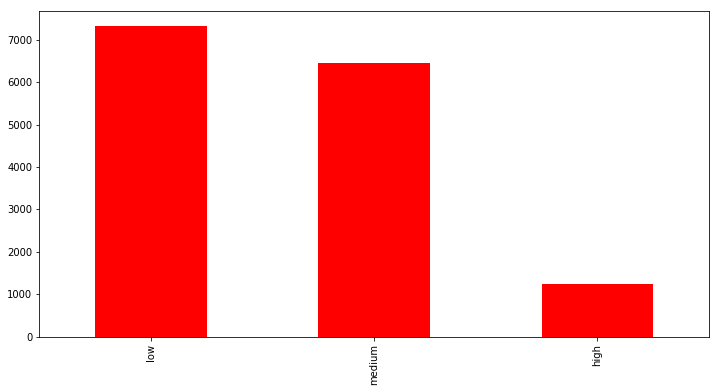

In [99]:
fig=plt.gcf()
fig.set_size_inches(12,6)
data['salary'].value_counts().plot.bar(color = 'red')
plt.show()

***8.Показать распределение сотрудников по зарплатам совместно с департаментами.***

<Figure size 864x432 with 0 Axes>

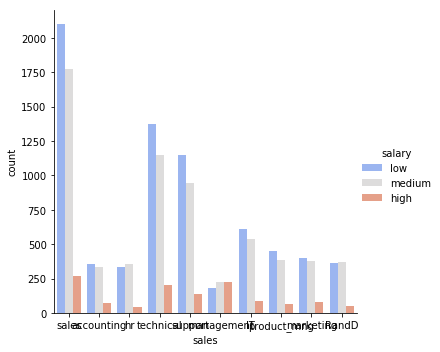

<Figure size 864x432 with 0 Axes>

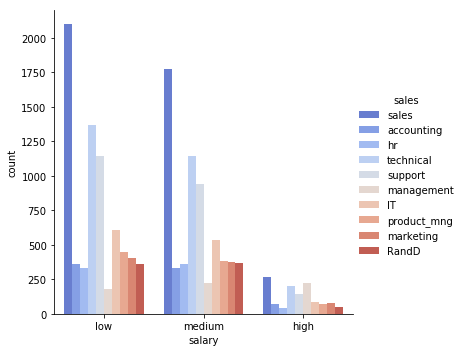

In [120]:
fig=plt.gcf()
fig.set_size_inches(12,6)
sns.catplot(x = 'sales', data=data[['salary','sales']],hue='salary', kind='count', palette='coolwarm')
plt.show()
fig=plt.gcf()
fig.set_size_inches(12,6)
sns.catplot(x = 'salary' , data=data[['salary','sales']],hue='sales', kind='count', palette='coolwarm')
plt.show()

***9.Сколько сотрудников покинули компанию.***

In [128]:
print(data[data['left'] == 1]['sales'].value_counts())
print('всего покинули компанию - ', sum(data[data['left'] == 1]['sales'].value_counts()))

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64
всего покинули компанию -  3571


***10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.***

In [132]:
left0 = data[data['left'] == 0]['salary'].value_counts()
left1 = data[data['left'] == 1]['salary'].value_counts()

print(left0.mean())
print(left1.mean())
stats.ttest_ind(left0, left1)


3809.3333333333335
1190.3333333333333


Ttest_indResult(statistic=1.7947580052970216, pvalue=0.1471332863683946)

***Прежде всего получаем, что выборки по уровню зарплаты отличаются у Уволившихся и Оставшихся работников, p > 5%***

In [134]:
left0 = data[data['left'] == 0]['average_montly_hours']
left1 = data[data['left'] == 1]['average_montly_hours']

print(left0.mean())
print(left1.mean())
stats.ttest_ind(left0, left1)


199.0602030101505
207.41921030523662


Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

***Гипотеза, что уволняются из-за переработки можно отклонить, обе выработки статистически не отдичаются***

In [135]:
left0 = data[data['left'] == 0]['time_spend_company']
left1 = data[data['left'] == 1]['time_spend_company']

print(left0.mean())
print(left1.mean())
stats.ttest_ind(left0, left1)

3.3800315015750786
3.876505180621675


Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)

***Гипотеза, что уволняются меньше при большем сроке работы можно отклонить, обе выработки статистически не отдичаются***



In [141]:
left0 = data[data['left'] == 0]['Work_accident'].value_counts()
left1 = data[data['left'] == 1]['Work_accident'].value_counts()

print(left0.mean())
print(left1.mean())
stats.ttest_ind(left0, left1)

5714.0
1785.5


Ttest_indResult(statistic=0.96987086247946, pvalue=0.4344222951461405)

***Гипотеза, что уволившиеся работники имеют статистически значимое отклонение по количеству Инцидентов подтверждается, p > 5%***

In [142]:
left0 = data[data['left'] == 0]['last_evaluation']
left1 = data[data['left'] == 1]['last_evaluation']

print(left0.mean())
print(left1.mean())
stats.ttest_ind(left0, left1)

0.7154733986699274
0.7181125735088183


Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)

***Подтверждается гипотеза, что последняя оценка у двух групп отличается***

In [144]:
left0 = data[data['left'] == 0]['promotion_last_5years'].value_counts()
left1 = data[data['left'] == 1]['promotion_last_5years'].value_counts()

print(left0.mean())
print(left1.mean())
stats.ttest_ind(left0, left1)

5714.0
1785.5


Ttest_indResult(statistic=0.6898273977371171, pvalue=0.5615932459870836)

***Гипотеза, что уволняются из-за отсутствия продвижения подтверждается***

***Сотрудники покидают компанию из-за отсутствия продвижения, и из-за низкой зарплаты***